In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# importing the images
# loading the image as a grayscale image
img0C = cv2.imread('testImages/C3.PNG')  # '/content/drive/MyDrive/Colab Notebooks/CO543/PROJECT/inputImages/H1.PNG'
img1C = cv2.imread('testImages/H2.PNG')
img2C = cv2.imread('testImages/H3.PNG')

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
# ax1.set_title('Image 0')
# ax1.imshow(img0C, cmap='jet')
# ax2.set_title('Image 1')
# ax2.imshow(img1C, cmap='jet')
# ax3.set_title('Image 2')
# ax3.imshow(img2C, cmap='jet')
print(img0C.shape)
print(img1C.shape)
print(img2C.shape)

(26, 41, 3)
(16, 48, 3)
(58, 81, 3)


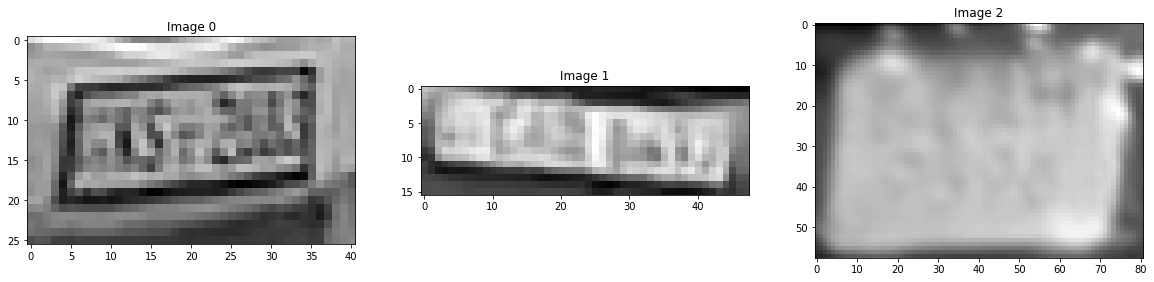

In [5]:
img0G = cv2.cvtColor(img0C, cv2.COLOR_BGR2GRAY)
img1G = cv2.cvtColor(img1C, cv2.COLOR_BGR2GRAY)
img2G = cv2.cvtColor(img2C, cv2.COLOR_BGR2GRAY)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('Image 0')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Image 1')
ax2.imshow(img1G, cmap='gray')
ax3.set_title('Image 2')
ax3.imshow(img2G, cmap='gray')

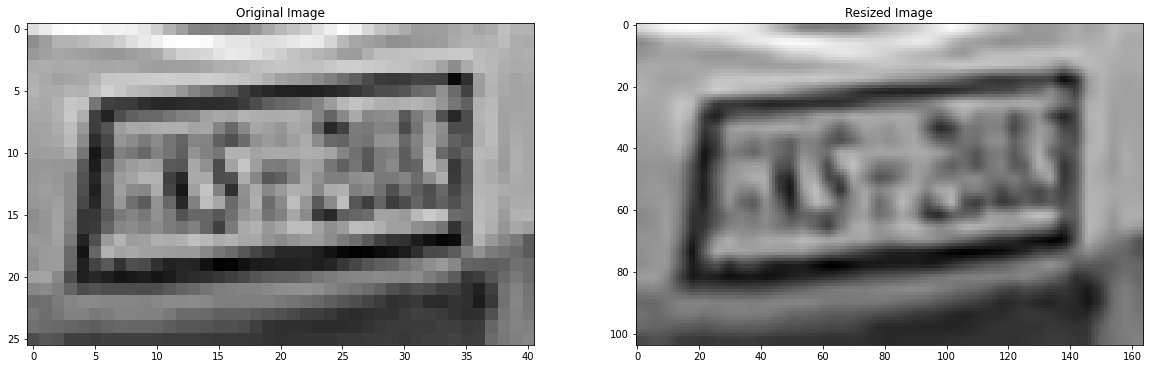

In [6]:
# Resized image
img0G_resized = cv2.resize(img0G,dsize=None,fx=4,fy=4)
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Resized Image')
ax2.imshow(img0G_resized, cmap='gray')

## Trying Gabor Filters

Creating the kernel

In [22]:
ksize = 30
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 2
phi  = 0

n = 32

kernels = []

for i in range(1, n-1):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, i*np.pi/(n), lamda, gamma, phi, ktype=cv2.CV_32F)
    kernels.append(kernel)

# kernel = cv2.getGaborKernel((ksize, ksize), sigma, 4*np.pi/16, lamda, gamma, phi, ktype=cv2.CV_32F)

# plt.imshow(kernel)

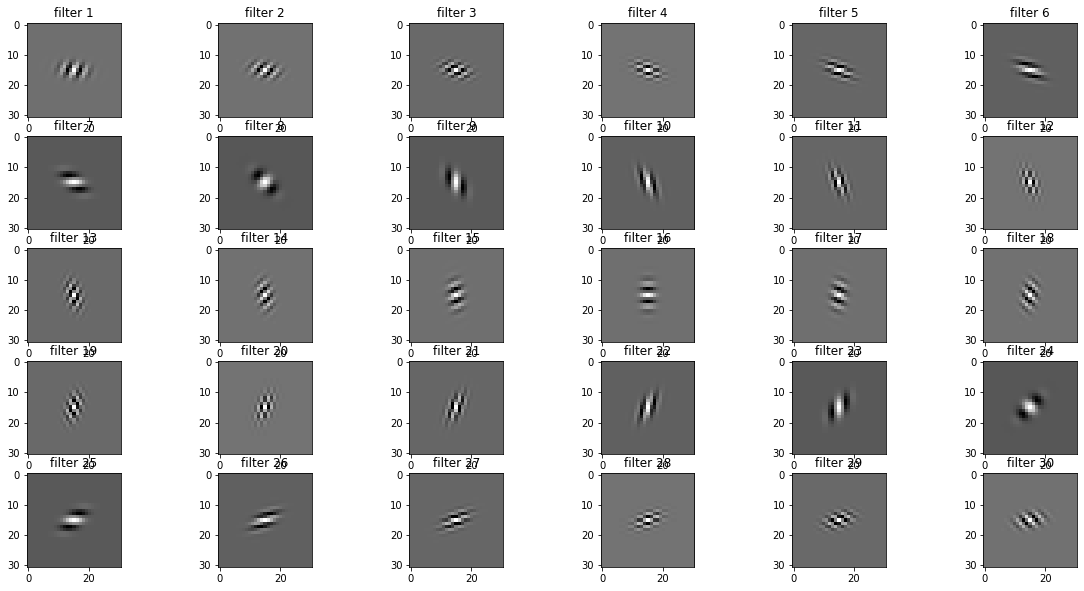

In [23]:
fig, axs = plt.subplots(5, 6, figsize=(20, 10))

sss=0
for ax in axs.reshape(-1): 
  ax.set_title('filter '+str(sss+1))
  ax.imshow(kernels[sss], cmap='gray')
  sss += 1

Applying to the filter 

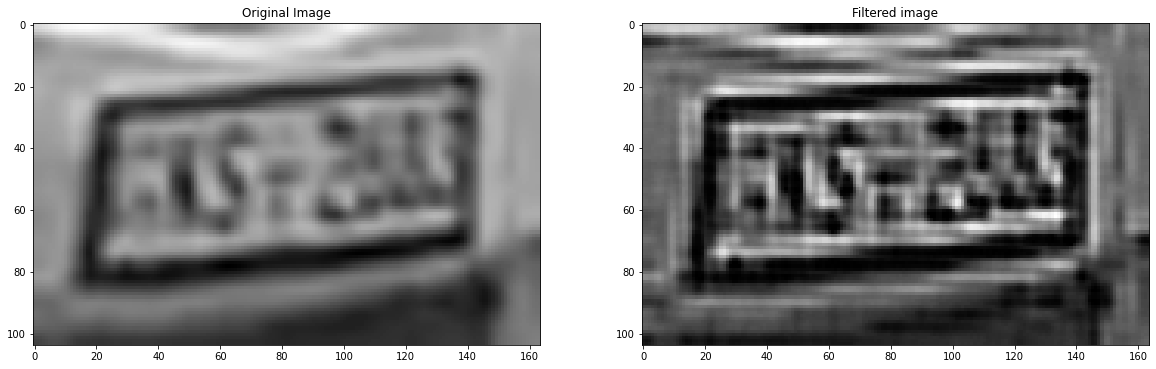

In [24]:
fimg_OR = np.zeros(img0G_resized.shape[:2])
gaussBlurred = cv2.GaussianBlur(img0G_resized, (3, 3), 0)
fimgs = []

for i in range(n-2):
    fimg = cv2.filter2D(gaussBlurred, cv2.CV_8UC3, kernel = kernels[i])
    fimg_OR += fimg
    fimgs.append(fimg)

fimg_OR = fimg_OR / (n-2)

cv2.imwrite('out/1.png', fimg_OR)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(gaussBlurred, cmap='gray')

ax2.set_title('Filtered image')
ax2.imshow(fimg_OR, cmap='gray')

start by tuning the hyper parameters of the gabor filter